In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('titanic (1).csv')

In [4]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


**we can see the 'number' column has both categorical and numerical data, so we split it into 2 columns**

In [5]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

1. 'A' means the person is travelling alone

2. The other numbers indicate the number of people the person is travelling with

<class 'matplotlib.axes._axes.Axes'>


Text(0.5, 1.0, 'Passengers travelling with')

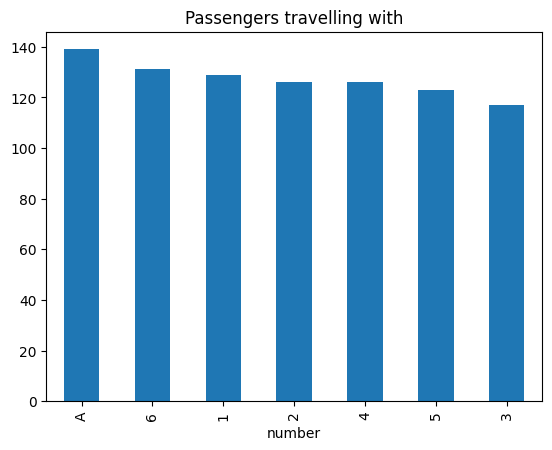

In [9]:
fig = df['number'].value_counts().plot.bar()
print(type(df['number'].value_counts().plot.bar()))
fig.set_title('Passengers travelling with')

**single column has numerical and categorical values**



> pandas.to_numeric(arg, errors='raise', downcast=None, dtype_backend=<no_default>)

> Convert argument to a numeric type.

> Parameters:

1. arg : scalar, list, tuple, 1-d array, or Series

Argument to be converted.

2. errors{‘raise’, ‘coerce’}, default ‘raise’
If ‘raise’, then invalid parsing will raise an exception.

If ‘coerce’, then invalid parsing will be set as NaN.

3. downcast : str, default None
Can be ‘integer’, ‘signed’, ‘unsigned’, or ‘float’. If not None, and if the data has been successfully cast to a numerical dtype (or if the data was numeric to begin with), downcast that resulting data to the smallest numerical dtype possible according to the following rules:

‘integer’ or ‘signed’: smallest signed int dtype (min.: np.int8)

‘unsigned’: smallest unsigned int dtype (min.: np.uint8)

‘float’: smallest float dtype (min.: np.float32)

In [10]:
# extract numerical part
df['number_numerical'] = pd.to_numeric(
    df['number'],errors='coerce',downcast='integer'
)

df['number_numerical']

,number_numerical
0,5.0
1,3.0
2,6.0
3,3.0
4,NaN
...,...
886,3.0
887,3.0
888,1.0
889,2.0


> numpy.where(condition, [x, y, ]/)
Return elements chosen from x or y depending on condition.

> Where True, yield x, otherwise yield y.

In [11]:
# extract categorical part
df['number_numerical'].isnull()

,number_numerical
0,False
1,False
2,False
3,False
4,True
...,...
886,False
887,False
888,False
889,False


In [17]:
# extracct categorical part
df['number_categorical'] = np.where(
    df['number_numerical'].isnull(),
    df['number'],
    np.nan
)

In [18]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


**entire column has cells containing a combo of  categorical + numerical values**

In [19]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [20]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

```
>>> s = pd.Series(["A_Str_Series"])
>>> s
0    A_Str_Series
dtype: str
```

```
>>> s.str.split("_")
0    [A, Str, Series]
dtype: object
```

In [21]:
# capture numerical data
df['cabin_numerical'] = df['Cabin'].str.extract('(\d+)')


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2605935330.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['cabin_numerical'] = df['Cabin'].str.extract('(\d+)')


In [22]:
# capture the first letter -> categories
df['cabin_categorical'] = df['Cabin'].str[0]

In [23]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_numerical,cabin_categorical
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<Axes: xlabel='cabin_categorical'>

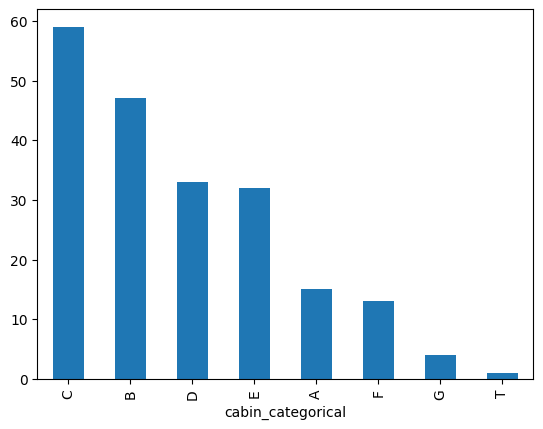

In [25]:
df['cabin_categorical'].value_counts().plot(kind='bar')

In [26]:
df['Ticket'].head(1)

,Ticket
0,A/5 21171


In [27]:
df['Ticket'].head(1).apply(lambda s : s.split()[-1])

,Ticket
0,21171


In [28]:
df['Ticket'].head(1).apply(lambda s : s.split()[0])

,Ticket
0,A/5


In [35]:
# extract the last bit of ticket as number
df['ticket_number'] = df['Ticket'].apply(lambda s : s.split()[-1])
df['ticket_number'].head(1).values

array(['21171'], dtype=object)

In [37]:
df['ticket_number'] = pd.to_numeric(
    df['ticket_number'],
    errors = 'coerce',
    downcast = 'integer'
)

In [38]:
# extract the first part of the ticket as category
df['ticket_categorical'] = df['Ticket'].apply(
    lambda s : s.split()[0]
)
df['ticket_categorical'] = np.where(
    df['ticket_categorical'].str.isdigit(),
    np.nan, df['ticket_categorical']
)

df.head(20)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_numerical,cabin_categorical,ticket_number,ticket_categorical
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
5,NaN,330877,2,0,2.0,NaN,NaN,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,NaN,46,E,17463.0,NaN
7,NaN,349909,5,0,5.0,NaN,NaN,NaN,349909.0,NaN
8,NaN,347742,1,1,1.0,NaN,NaN,NaN,347742.0,NaN
9,NaN,237736,A,1,NaN,A,NaN,NaN,237736.0,NaN


In [39]:
df['ticket_categorical'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

<Axes: xlabel='ticket_categorical'>

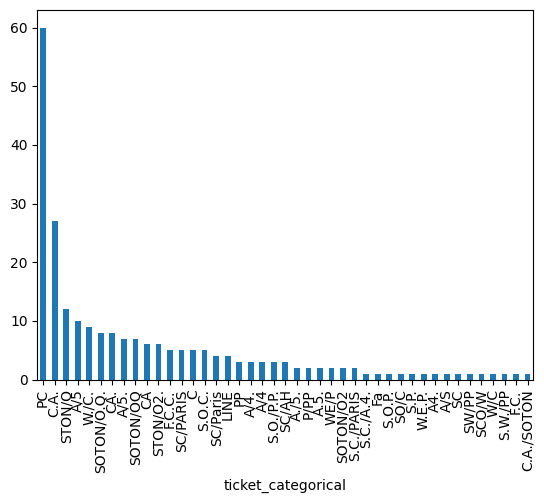

In [40]:
df['ticket_categorical'].value_counts().plot(kind='bar')